# **Santander Customer Transaction Prediction using ML**
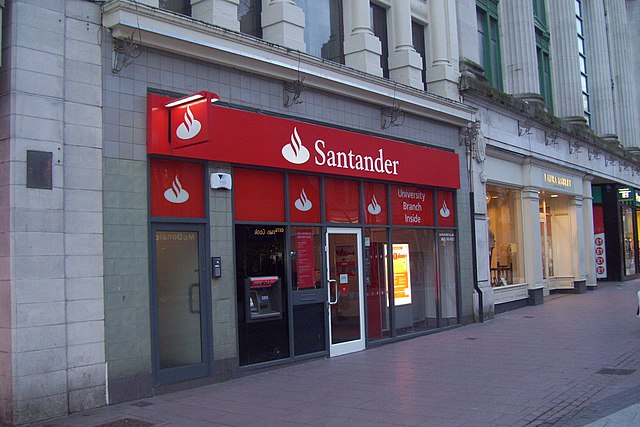

- Dataset used: [Santander Customer Transcation Dataset](https://www.kaggle.com/competitions/santander-customer-transaction-prediction)
- In this challenge, Santander invites Kagglers to help them identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted
- The data provided in this dataset has the same structure as the real data they have available to solve this problem.
- Dataset consists of 200k+ rows and 200+ columns
- The data is anonimyzed, each row containing 200 numerical values identified just with a number
- To run this notebook, select "Run" > "Run on Colab" and connect your Google Drive account with Jovian. Make sure to use the GPU runtime if you plan on using a GPU.


##  Download the Dataset

Steps:

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas

### Install Required Libraries

In [ ]:
!pip install opendatasets numpy pandas jovian matplotlib  scikit-learn  --quiet

In [ ]:
import jovian
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Download Data from Kaggle

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/c/santander-customer-transaction-prediction/overview'

In [ ]:
%%time
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ram2409
Your Kaggle Key: ··········


100%|██████████| 250M/250M [00:01<00:00, 143MB/s]



Extracting archive ./santander-customer-transaction-prediction/santander-customer-transaction-prediction.zip to ./santander-customer-transaction-prediction
CPU times: user 5.99 s, sys: 1.54 s, total: 7.53 s
Wall time: 19.7 s


In [ ]:
data_dir = './santander-customer-transaction-prediction'

### View Dataset Files

In [ ]:
# List of files with size
!ls -lh {data_dir}

total 579M
-rw-r--r-- 1 root root 2.6M Apr  8 03:25 sample_submission.csv
-rw-r--r-- 1 root root 288M Apr  8 03:25 test.csv
-rw-r--r-- 1 root root 289M Apr  8 03:25 train.csv


In [ ]:
# Training set
!head {data_dir}/train.csv

ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136

In [ ]:
# Training set
!head {data_dir}/test.csv

ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_13

In [ ]:
# Sample submission file
!head {data_dir}/sample_submission.csv

ID_code,target
test_0,0
test_1,0
test_2,0
test_3,0
test_4,0
test_5,0
test_6,0
test_7,0
test_8,0


In [ ]:
# No. of lines in training set
!wc -l {data_dir}/train.csv

200001 ./santander-customer-transaction-prediction/train.csv


In [ ]:
# No. of lines in test set
!wc -l {data_dir}/test.csv

200001 ./santander-customer-transaction-prediction/test.csv


In [ ]:
# No. of lines in submission file
!wc -l {data_dir}/sample_submission.csv

200001 ./santander-customer-transaction-prediction/sample_submission.csv


Observations:

- Trainning and test data set has 200k+ rows
- Training and test data has 200+ columns.
- All the feature columns are in numbers


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/ram9008478075/ml-project2


'https://jovian.ai/ram9008478075/ml-project2'

### Loading Training and Test Set

In [ ]:
%%time
train_df = pd.read_csv(data_dir+"/train.csv")
test_df = pd.read_csv(data_dir+"/test.csv")


CPU times: user 11.8 s, sys: 830 ms, total: 12.6 s
Wall time: 12.6 s


In [ ]:
train_df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [ ]:
test_df

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


##  Explore the Dataset



Let's check the train and test set.

In [ ]:
train_df.shape, test_df.shape

((200000, 202), (200000, 201))

Both train and test data have 200,000 entries and 202, respectivelly 201 columns.

Let's glimpse train and test dataset.

In [ ]:
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


Train contains:

ID_code (string),target and
200 numerical variables named from var_0 to var_199.


In [ ]:
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


Test contains:

ID_code (string) and
200 numerical variables named from var_0 to var_199.

Let's check if there are any missing data. We will also check the type of data.

First we check train data

In [ ]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
%%time
missing_data(train_df)

CPU times: user 353 ms, sys: 4 ms, total: 357 ms
Wall time: 365 ms


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


Let we also check test data

In [ ]:
%%time
missing_data(test_df)

CPU times: user 339 ms, sys: 6.65 ms, total: 346 ms
Wall time: 349 ms


,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


There are no missing data in train and test datasets. Let's check the numerical values in train and test dataset.

In [ ]:
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [ ]:
test_df.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


Observations
   - min, max, mean, std dev values for train and test data are close.
   - mean values are distributed over a large range. 
   - standard deviation is relatively large for both train and test variable data

### Exploratory Data Analysis and Visualization

#### Distribution of target value in training set

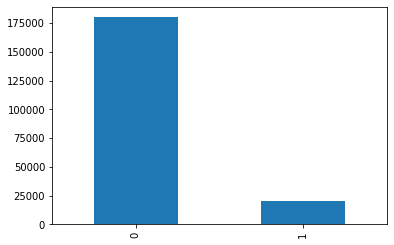

In [ ]:
train_df['target'].value_counts().plot.bar();

In [ ]:
print("There are {}% target values with 1".format(100 * train_df["target"].value_counts()[1]/train_df.shape[0]))

There are 10.049% target values with 1


Observation:
  - The number of customers that will not make a transaction is much higher than those that will.
  - The data is unbalanced with respect to the `target` value 

#### Distribution of mean and std dev

Let's check the distribution of the mean values per row in the train and test set.

In [ ]:
sns.set_style('whitegrid')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


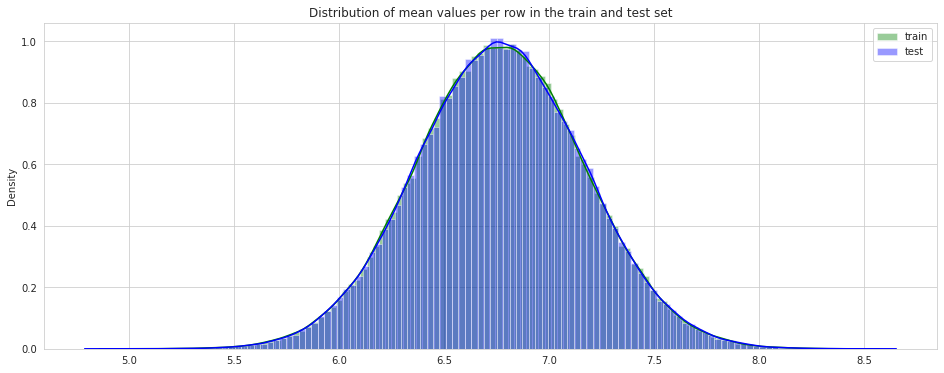

In [ ]:
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train_df[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

Observation:
- The value are in range from 5 to 8 which shows that it doesn't have high range distribution of mean values
- From the above graph we can say that the maximum mean value is upto 8  
- For some rows values are similar for both as it shown in the graph 

Let's check the distribution of the mean values per columns in the train and test set.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


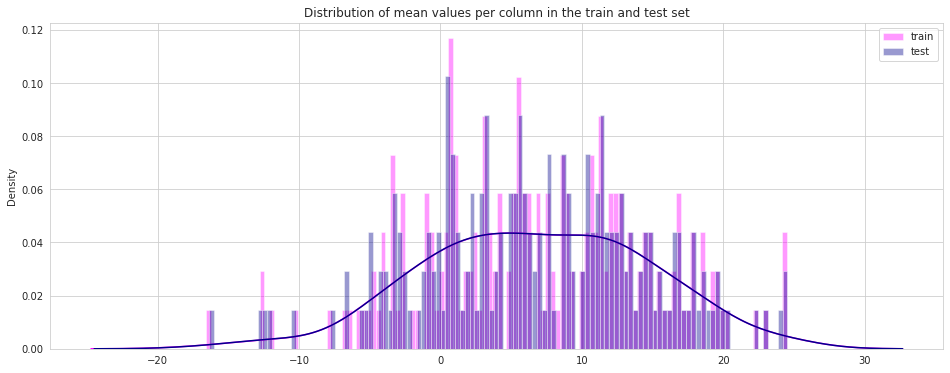

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train_df[features].mean(axis=0),color="magenta",kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

Observation: 
- columns have different range of mean values(from -20 to upto 30)
- values in columns are more or less similar

Let's show the distribution of standard deviation of values per row for train and test datasets.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


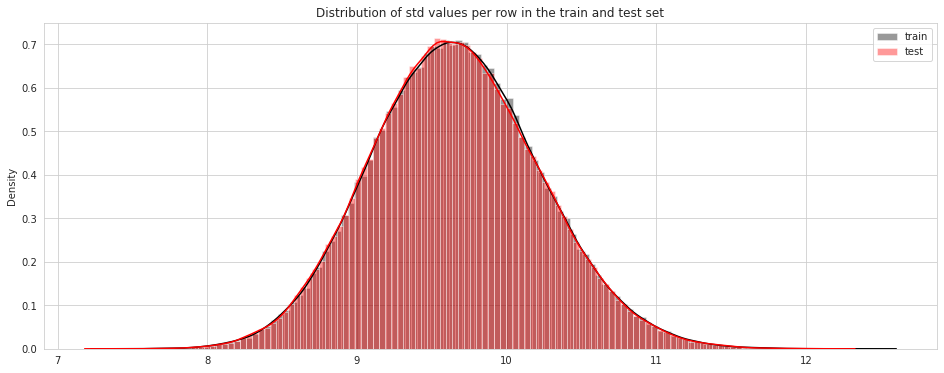

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train_df[features].std(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(test_df[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend();plt.show()

Observation:
- The values are in the range from nearly 8 to 12
- For some rows values are similar for both as shown in the figure

Let's check the distribution of the standard deviation of values per columns in the train and test datasets.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


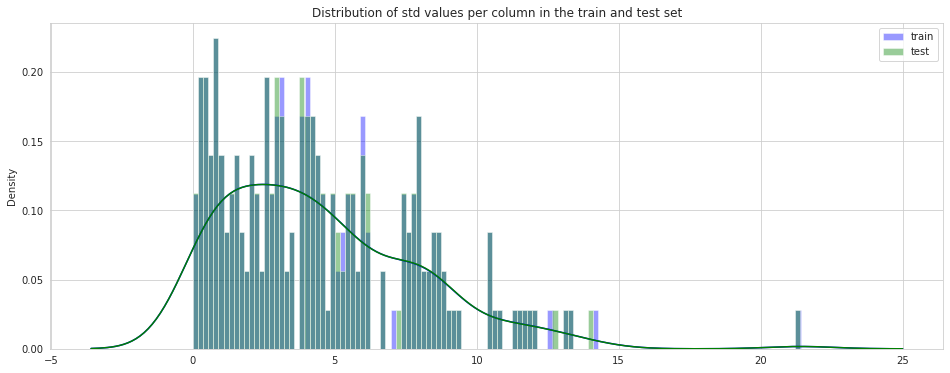

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.distplot(train_df[features].std(axis=0),color="blue",kde=True,bins=120, label='train')
sns.distplot(test_df[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend(); plt.show()

Observation:
- There is a high range of std values(upto 20)
- values in column are more are less similar

#### Distribution of min and max

Let's check the distribution of min per row in the train and test set.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


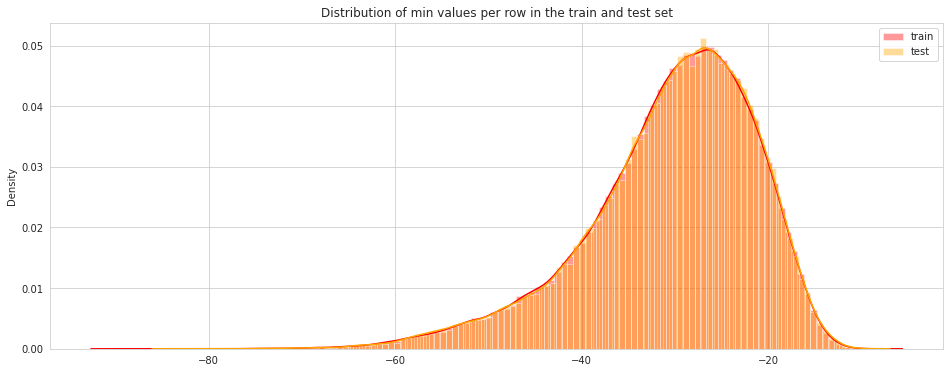

In [ ]:
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of min values per row in the train and test set")
sns.distplot(train_df[features].min(axis=1),color="red", kde=True,bins=120, label='train')
sns.distplot(test_df[features].min(axis=1),color="orange", kde=True,bins=120, label='test')
plt.legend()
plt.show()

From this graph we observed that:
- A long queue to the lower values for both, extended as long as to -80 for test set, is observed.

Let's now show the distribution of min per column in the train and test set.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


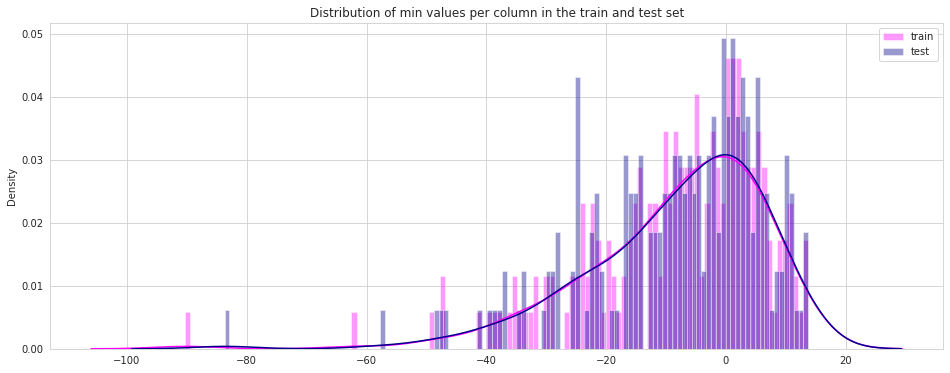

In [ ]:
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of min values per column in the train and test set")
sns.distplot(train_df[features].min(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test_df[features].min(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

Observation:
- There is a different range of values i.e. from -100 to 20 
- It has left skewed distribution of values

Let's check now the distribution of max values per rows for train and test set.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


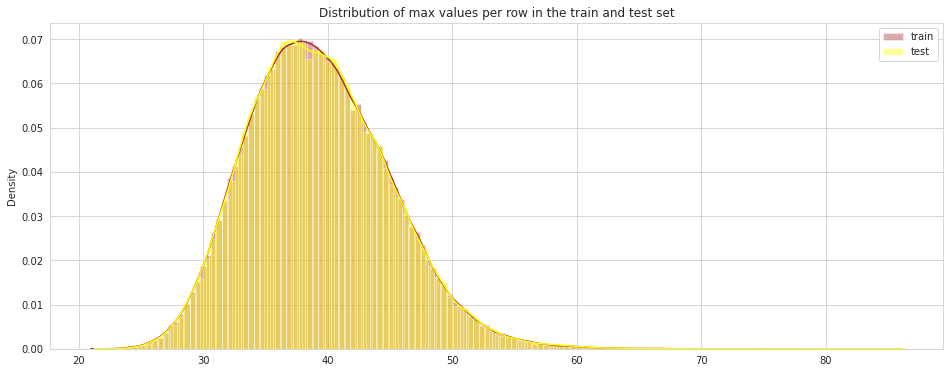

In [ ]:
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of max values per row in the train and test set")
sns.distplot(train_df[features].max(axis=1),color="brown", kde=True,bins=120, label='train')
sns.distplot(test_df[features].max(axis=1),color="yellow", kde=True,bins=120, label='test')
plt.legend()
plt.show()

Observation:
- The values are in the range from 20 to nearly 60
- We can say that it is right skewed distribution 

Let's show now the max distribution on columns for train and test set.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


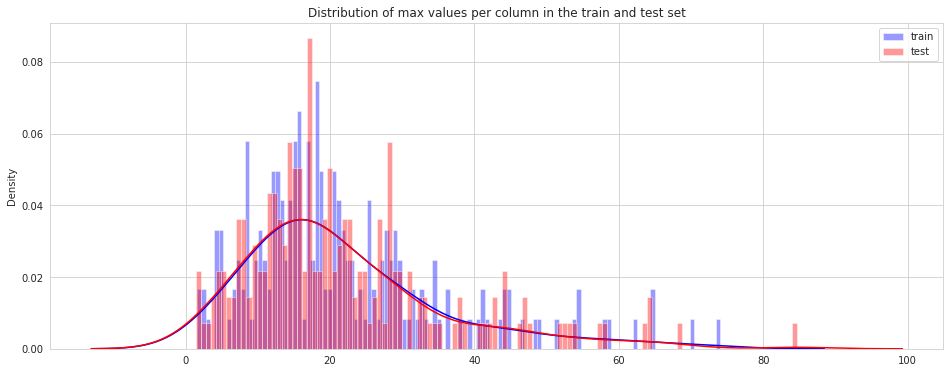

In [ ]:
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of max values per column in the train and test set")
sns.distplot(train_df[features].max(axis=0),color="blue", kde=True,bins=120, label='train')
sns.distplot(test_df[features].max(axis=0),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

Observations:
- The distribution of values are in the range from 0 to nearly 100
- We can see that the distribution of values are bit right skewed

## Feature Engineering

Let's add few aggregated values for existing features.

In [ ]:
idx = train_df.columns.values[2:202]
for df in [test_df, train_df]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

Let's check the new added features

In [ ]:
train_df[train_df.columns[202:]].head()

,sum,min,max,mean,std,skew,kurt,med
0,1456.3182,-21.4494,43.1127,7.281591,9.331540,0.101580,1.331023,6.77040
1,1415.3636,-47.3797,40.5632,7.076818,10.336130,-0.351734,4.110215,7.22315
2,1240.8966,-22.4038,33.8820,6.204483,8.753387,-0.056957,0.546438,5.89940
3,1288.2319,-35.1659,38.1015,6.441159,9.594064,-0.480116,2.630499,6.70260
4,1354.2310,-65.4863,41.1037,6.771155,11.287122,-1.463426,9.787399,6.94735


In [ ]:
test_df[test_df.columns[201:]].head()

,sum,min,max,mean,std,skew,kurt,med
0,1416.6404,-31.9891,42.0248,7.083202,9.910632,-0.088518,1.871262,7.31440
1,1249.6860,-41.1924,35.6020,6.248430,9.541267,-0.559785,3.391068,6.43960
2,1430.2599,-34.3488,39.3654,7.151299,9.967466,-0.135084,2.326901,7.26355
3,1411.4447,-21.4797,40.3383,7.057223,8.257204,-0.167741,2.253054,6.89675
4,1423.7364,-24.8254,45.5510,7.118682,10.043542,0.293484,2.044943,6.83375


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/ram9008478075/ml-project2


'https://jovian.ai/ram9008478075/ml-project2'

## Prepare Dataset for Training and building Model
- Split Training & Validation Set
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data. 


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features = train_df.columns.values[2:]

In [ ]:
X = train_df.loc[:,features]
y = train_df.loc[:,'target']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((160000, 208), (40000, 208), (160000,), (40000,))

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

We'll build different logistic regression models with different parameters

Logistic Regression - Model1

In [ ]:
logregmodel1 = LogisticRegression(solver='sag', multi_class="auto", n_jobs=-1, C=1)

In [ ]:
logregmodel1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=1, n_jobs=-1, solver='sag')

In [ ]:
y_pred = logregmodel1.predict(X_valid)

First we've created our model and given different parameters to it, in the next step we have fitted that to our model and atlast we predicted the output 

I'm going to add a confusion matrix in here & start seeing how well I did with my logistic regression model.

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_valid,y_pred)
cnf_matrix

array([[35521,   382],
       [ 3208,   889]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))
print("Precision:",metrics.precision_score(y_valid, y_pred))

Accuracy: 0.91025
Precision: 0.6994492525570417


Logistic  Regression - Model2

In [ ]:
logregmodel2 = LogisticRegression(solver='lbfgs', max_iter=1500, C=10)

In [ ]:
logregmodel2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=10, max_iter=1500)

In [ ]:
y_pred1 = logregmodel2.predict(X_valid)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_valid,y_pred1)
cnf_matrix

array([[35412,   491],
       [ 2927,  1170]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred1))
print("Precision:",metrics.precision_score(y_valid, y_pred1))

Accuracy: 0.91455
Precision: 0.7043949428055388


In the above logistic regression model, we got precision which is nearly 0.7 

In [ ]:
my_submission = logregmodel2.predict(test_df[features])

In [ ]:
output= pd.DataFrame({'ID_code': test_df.ID_code,
                       'target': my_submission})
output.to_csv('logreg_submission.csv', index=False)

In [ ]:
output

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


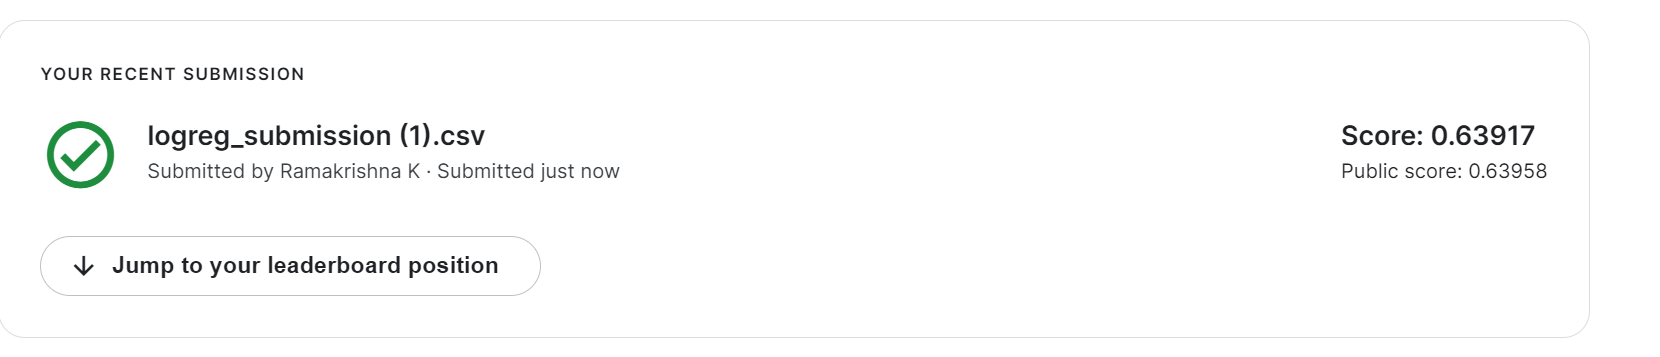

We got 0.63917 score in kaggle competetion which gives rank nearly 7800 out of nearly 8800

### LGBM model

In [ ]:
import lightgbm
from sklearn.model_selection import StratifiedKFold

import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
train_data = lightgbm.Dataset(X_train, label=y_train)
valid_data = lightgbm.Dataset(X_valid, label=y_valid)

**Let us do the hyperparameter tuning for lgbm model**

First Model

In [ ]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}

We've created parameters for lgbm model as shown above

In [ ]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=44000)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, y.values)):
    print("Fold {}".format(fold_))
    trn_data = lightgbm.Dataset(train_df.iloc[trn_idx][features], label=y.iloc[trn_idx])
    val_data = lightgbm.Dataset(train_df.iloc[val_idx][features], label=y.iloc[val_idx])

    num_round = 1000000
    clf = lightgbm.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits
print("CV score: {:<8.5f}".format(roc_auc_score(y, oof)))



Fold 0
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.899868	valid_1's auc: 0.887298
[2000]	training's auc: 0.911064	valid_1's auc: 0.89451
[3000]	training's auc: 0.918629	valid_1's auc: 0.898354
[4000]	training's auc: 0.924588	valid_1's auc: 0.900204
[5000]	training's auc: 0.92949	valid_1's auc: 0.901068
[6000]	training's auc: 0.933856	valid_1's auc: 0.90157
[7000]	training's auc: 0.937789	valid_1's auc: 0.901936
[8000]	training's auc: 0.941479	valid_1's auc: 0.901935
[9000]	training's auc: 0.94506	valid_1's auc: 0.901887
[10000]	training's auc: 0.948392	valid_1's auc: 0.90188
Early stopping, best iteration is:
[7635]	training's auc: 0.94016	valid_1's auc: 0.902045
Fold 1
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.900243	valid_1's auc: 0.880051
[2000]	training's auc: 0.911119	valid_1's auc: 0.888823
[3000]	training's auc: 0.91872	valid_1's auc: 0.893517
[4000]	training's auc: 0.924627	valid_1's auc

We've splitted data by using Stratified K-Fold cross validator after that we trained the lgbm model, we got valid accuracy almost 0.9  

In [ ]:
sub_df = pd.DataFrame({"ID_code":test_df["ID_code"].values})
sub_df["target"] = predictions
sub_df.to_csv("submission.csv", index=False)                              

In [ ]:
jovian.commit()

we've saved our predictions into submission file 

 Second model 

In [ ]:
parameters1 = {'learning_rate':   0.05, 
                                  'max_bin': 165,
                                  'metric': 'auc',
                                  'max_depth': 5, 
                                  'is_unbalance': 'true',
                                  'min_child_samples': 150,
                                  'min_child_weight': 0.1, 
                                  'min_split_gain': 0.0018, 
                                  'n_estimators': 41,
                                  'num_leaves': 30, 
                                  'reg_alpha': 2.0, 
                                  'reg_lambda': 2.54, 
                                  'objective': 'binary', 
                                  'n_jobs': -1}

In [ ]:
model_lgbm1 = lightgbm.train(parameters1,
                            train_data,
                            valid_sets=valid_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.640222
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.670075
[3]	valid_0's auc: 0.687595
[4]	valid_0's auc: 0.700894
[5]	valid_0's auc: 0.71209
[6]	valid_0's auc: 0.717583
[7]	valid_0's auc: 0.725019
[8]	valid_0's auc: 0.731267
[9]	valid_0's auc: 0.733217
[10]	valid_0's auc: 0.737263
[11]	valid_0's auc: 0.742477
[12]	valid_0's auc: 0.744688
[13]	valid_0's auc: 0.749465
[14]	valid_0's auc: 0.753012
[15]	valid_0's auc: 0.755534
[16]	valid_0's auc: 0.757903
[17]	valid_0's auc: 0.759079
[18]	valid_0's auc: 0.75919
[19]	valid_0's auc: 0.762236
[20]	valid_0's auc: 0.763474
[21]	valid_0's auc: 0.766454
[22]	valid_0's auc: 0.767351
[23]	valid_0's auc: 0.769886
[24]	valid_0's auc: 0.771169
[25]	valid_0's auc: 0.772112
[26]	valid_0's auc: 0.773352
[27]	valid_0's auc: 0.775257
[28]	valid_0's auc: 0.777302
[29]	valid_0's auc: 0.779131
[30]	valid_0's auc: 0.780976
[31]	valid_0's auc: 0.781959
[32]	valid_0's auc: 0.783411
[33]	valid_0's auc: 0

In [ ]:
y_train_pred = model_lgbm1.predict(X_train)
y_valid_pred = model_lgbm1.predict(X_valid)

In [ ]:
print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.8312
AUC Valid: 0.7946


We'got 0.7946 valid accuracy which is less than our first model, let we try with different parameters to improve our model prediction

Third Model

In [ ]:
parameters2 = {'objective': 'binary',
              'metric': 'auc',
              'is_unbalance': 'true',
              'boosting': 'gbdt',
              'num_leaves': 63,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
              'verbose': -1
             }

In [ ]:
model_lgbm2 = lightgbm.train(parameters2,
                            train_data,
                            valid_sets=valid_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50)

[1]	valid_0's auc: 0.653645
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.687713
[3]	valid_0's auc: 0.707799
[4]	valid_0's auc: 0.724338
[5]	valid_0's auc: 0.735602
[6]	valid_0's auc: 0.739807
[7]	valid_0's auc: 0.747241
[8]	valid_0's auc: 0.748394
[9]	valid_0's auc: 0.755327
[10]	valid_0's auc: 0.758159
[11]	valid_0's auc: 0.758879
[12]	valid_0's auc: 0.760312
[13]	valid_0's auc: 0.763321
[14]	valid_0's auc: 0.765641
[15]	valid_0's auc: 0.768335
[16]	valid_0's auc: 0.769896
[17]	valid_0's auc: 0.771591
[18]	valid_0's auc: 0.771995
[19]	valid_0's auc: 0.773536
[20]	valid_0's auc: 0.774075
[21]	valid_0's auc: 0.777468
[22]	valid_0's auc: 0.780747
[23]	valid_0's auc: 0.781662
[24]	valid_0's auc: 0.783709
[25]	valid_0's auc: 0.785832
[26]	valid_0's auc: 0.787122
[27]	valid_0's auc: 0.787405
[28]	valid_0's auc: 0.789349
[29]	valid_0's auc: 0.79026
[30]	valid_0's auc: 0.791291
[31]	valid_0's auc: 0.792746
[32]	valid_0's auc: 0.794717
[33]	valid_0's auc: 

In [ ]:
y_train_pred = model_lgbm2.predict(X_train)
y_valid_pred = model_lgbm2.predict(X_valid)

In [ ]:
print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.9845
AUC Valid: 0.8942


In [ ]:
y_test=model_lgbm2.predict(test_df[features])

In [ ]:
test_df['target']=y_test
submit=test_df[['ID_code','target']]
submit.to_csv('submission.csv',index=False)

We've got 0.8942 valid score which is better than our second model

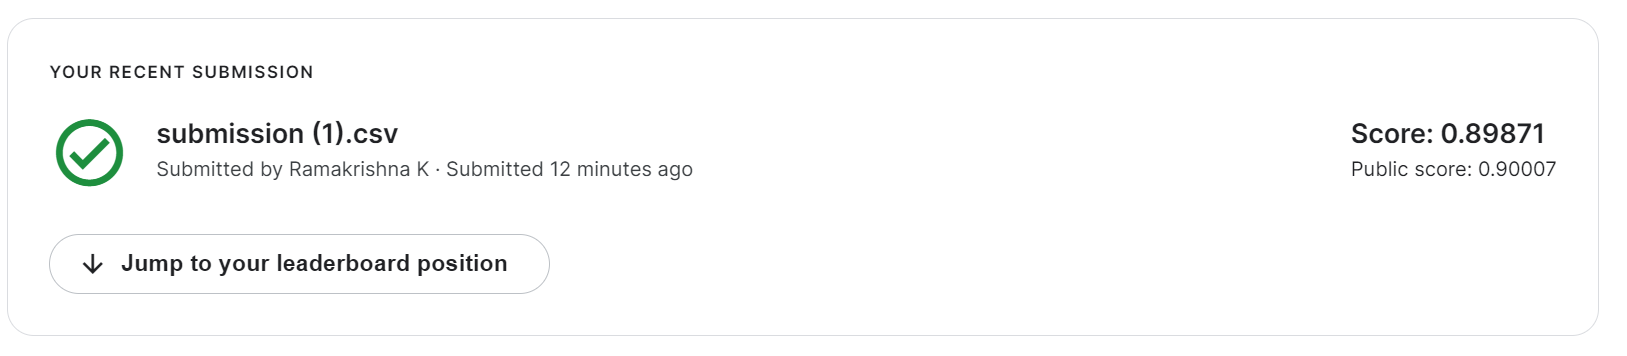

We have been able to acheive 0.89871 score in kaggle competetion using lgbm technique which gives position rougly in the top 30% still we can improve our model by tuning parameters 

### Summary

Let us look at the accuracy of all the models and figure out the best model 

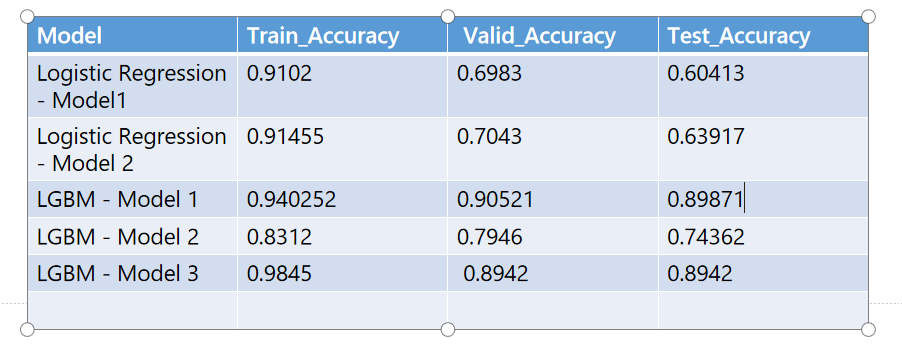

As we can see, LGBM is a better model for transaction prediction compare Logistic Regression model, beacuse it gives nearly 0.9 accuracy score by splitting data using Stratified K-Fold cross validator after that we trained and predicted using the model.

**Exercises**: 
1. Tune hyperparameters for lightgbm model.
2. Build xgboost and castboost model.

**References**
* Dataset:https://www.kaggle.com/competitions/santander-customer-transaction-prediction/overview
* Opendatsets library: https://github.com/JovianML/opendatasets 
* Machine learning project: https://jovian.ai/aakashns/nyc-taxi-fare-prediction-filled

* Machine Learning with Python: Zero to GBMs - https://zerotogbms.com


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/ram9008478075/ml-project2


'https://jovian.ai/ram9008478075/ml-project2'